In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl
%matplotlib inline

# Plotting Lines
There are several ways to represent a line in a 2D space. Let $x_1,x_2$ be the two axes.

One possibility is $x_2 = mx_1 +c$. However, in ML, we typically represent a line in the following form:

$
w_1x_1 + w_2x_2 = \theta
$

If $\theta = 0$, then the line passes through the origin, $(0,0)$

# Demo for Winnow
In this demo the data is assumed to be defined using 3 binary attributes. We assume a disjunctive target concept and label points according to the target concept.

In [2]:
# prepare data and assign labels according to the targetConcept
d = 3
theta = float(d) / 2
targetConcept = np.array([0,0,1]) # this is the chosen target concept: x3, i.e., any object with x3 as 1 is +ve
# generate data
data = np.array([[0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]])
# shuffle the ordering of data points
np.random.shuffle(data)
labels = np.any(data*np.tile(targetConcept,[8,1]),1)
# initialize w
w = np.ones([3,1])


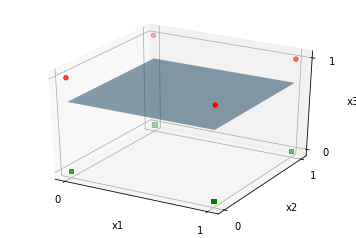

In [7]:
# show the points and labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[labels,0], data[labels,1], data[labels,2], c='r', marker='o')
ax.scatter(data[~labels,0], data[~labels,1], data[~labels,2], c='g', marker='s')
# show initial surface
xx, yy = np.meshgrid(range(0,2), range(0,2))
zz = (-w[0] * xx - w[1] * yy + theta) * 1. /w[2]
#plt3d = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, zz,linewidth=0,alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_zticks([0,1])

In [8]:
# consider each training example and update the decision surface
for i in range(8):
    p = np.dot(data[i,:],w) > theta
    if(p != labels[i]):
        # a mistake - update w
        if(labels[i]):
            w[data[i,:] == 1] = 2*w[data[i,:] == 1]
        else:
            w[data[i,:] == 1] = 0

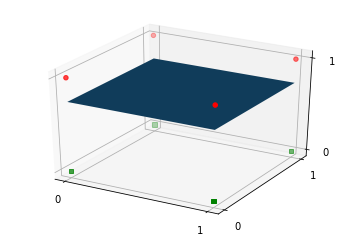

In [9]:
# show the points and labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[labels,0], data[labels,1], data[labels,2], c='r', marker='o')
ax.scatter(data[~labels,0], data[~labels,1], data[~labels,2], c='g', marker='s')
# show the learnt surface
xx, yy = np.meshgrid(range(0,2), range(0,2))
zz = (-w[0] * xx - w[1] * yy + theta) * 1. /w[2]
#plt3d = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, zz,linewidth=0,alpha=1)
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_zticks([0,1])